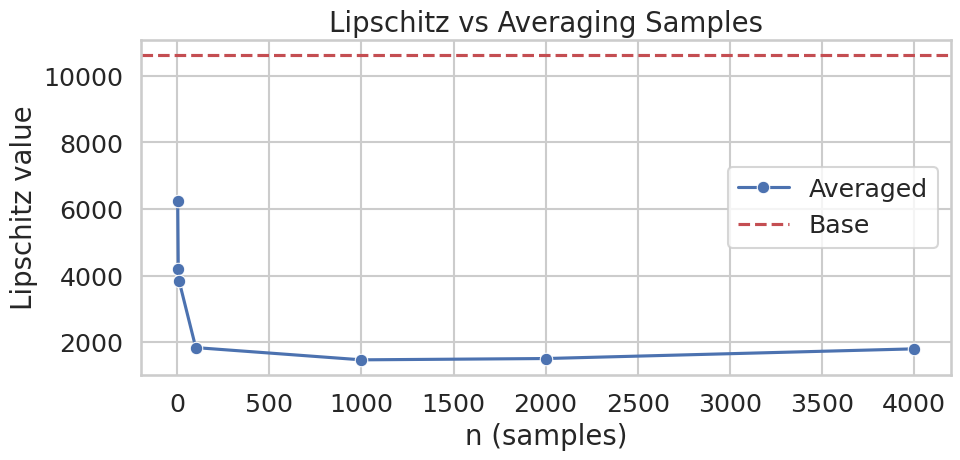

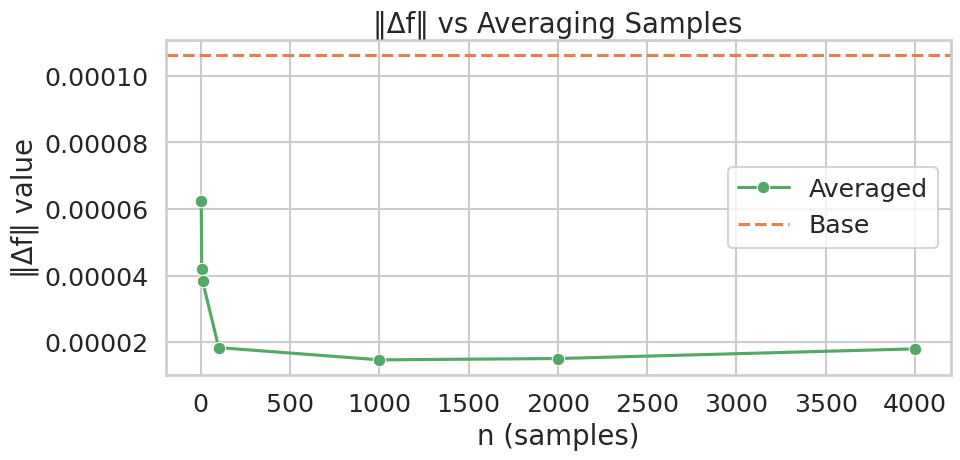

In [8]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Paste your full text line below
text = """ε=10^ -8 (1.00e-08): Lipschitz=10625.916912, ||Δf||=1.062592e-04, logit: 15.5897→15.5897, ||Δlogits||=8.846047e-04 | ' Paris' (p=0.3008→0.3008)
    + noise(n=2): Lipschitz=6236.390618, ||Δf||=6.236391e-05, logit: 15.5897→15.5897, ||Δlogits||=5.061300e-04 | ' Paris' (p=0.3009→0.3009)
    + noise(n=5): Lipschitz=4191.270273, ||Δf||=4.191270e-05, logit: 15.5897→15.5897, ||Δlogits||=3.277689e-04 | ' Paris' (p=0.3009→0.3009)
    + noise(n=10): Lipschitz=3831.459617, ||Δf||=3.831460e-05, logit: 15.5897→15.5897, ||Δlogits||=3.121543e-04 | ' Paris' (p=0.3009→0.3009)
    + noise(n=100): Lipschitz=1842.680649, ||Δf||=1.842681e-05, logit: 15.5897→15.5897, ||Δlogits||=1.714989e-04 | ' Paris' (p=0.3009→0.3009)
    + noise(n=1000): Lipschitz=1475.341196, ||Δf||=1.475341e-05, logit: 15.5897→15.5897, ||Δlogits||=1.201123e-04 | ' Paris' (p=0.3009→0.3009)
    + noise(n=2000): Lipschitz=1514.476662, ||Δf||=1.514477e-05, logit: 15.5897→15.5897, ||Δlogits||=1.224501e-04 | ' Paris' (p=0.3009→0.3009)
    + noise(n=4000): Lipschitz=1804.854583, ||Δf||=1.804855e-05, logit: 15.5897→15.5897, ||Δlogits||=1.356477e-04 | ' Paris' (p=0.3009→0.3009)
"""

# Extract base values
base_match = re.search(r"Lipschitz=([\d\.]+), \|\|Δf\|\|=([\deE\.\-]+)", text)
base_lip, base_df = map(float, base_match.groups())

# Extract averaged (noise) values
matches = re.findall(r"noise\(n=(\d+)\): Lipschitz=([\d\.]+), \|\|Δf\|\|=([\deE\.\-]+)", text)
data = pd.DataFrame({
    "n": [int(m[0]) for m in matches],
    "Lipschitz": [float(m[1]) for m in matches],
    "Δf": [float(m[2]) for m in matches]
})

# Seaborn style
sns.set(style="whitegrid", context="talk", font_scale=1.1)

# Plot Lipschitz
plt.figure(figsize=(10,5))
sns.lineplot(x="n", y="Lipschitz", data=data, marker="o", color="C0", label="Averaged")
plt.axhline(base_lip, color="C3", linestyle="--", label="Base")
plt.title("Lipschitz vs Averaging Samples")
plt.xlabel("n (samples)")
plt.ylabel("Lipschitz value")
plt.legend()
plt.tight_layout()
plt.show()

# Plot ||Δf||
plt.figure(figsize=(10,5))
sns.lineplot(x="n", y="Δf", data=data, marker="o", color="C2", label="Averaged")
plt.axhline(base_df, color="C1", linestyle="--", label="Base")
plt.title("‖Δf‖ vs Averaging Samples")
plt.xlabel("n (samples)")
plt.ylabel("‖Δf‖ value")
plt.legend()
plt.tight_layout()
plt.show()


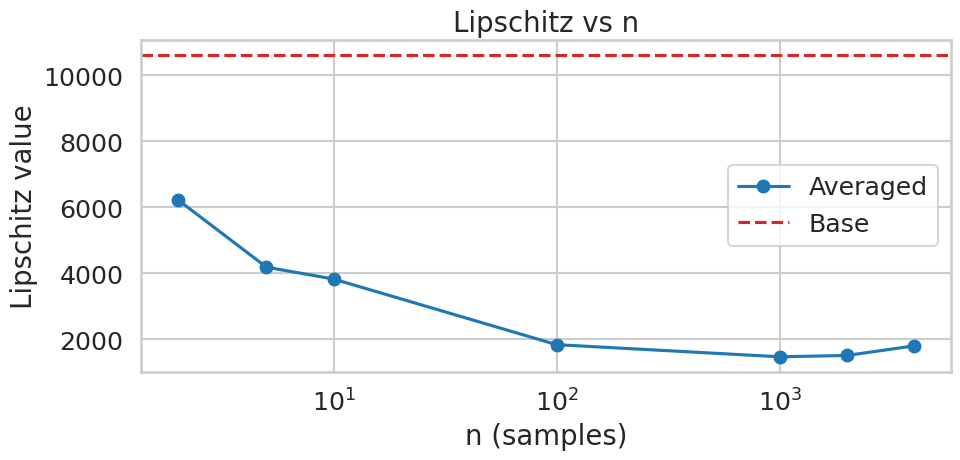

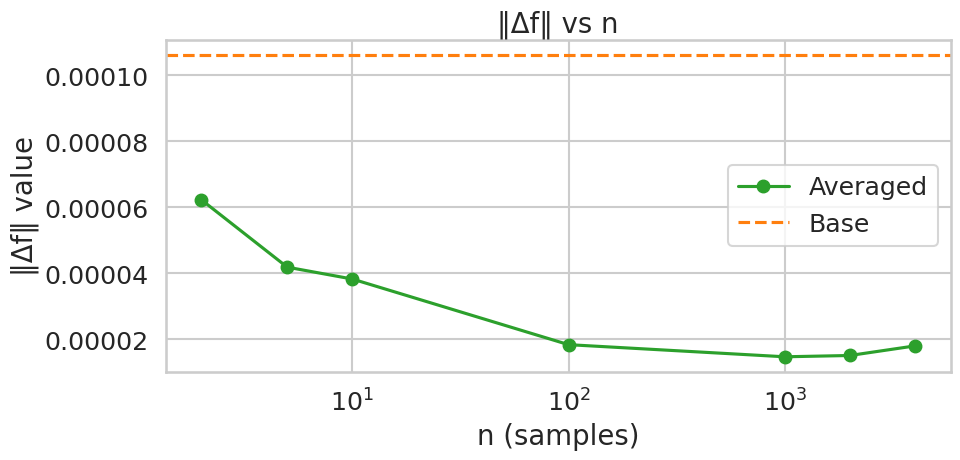

In [9]:
import re
import matplotlib.pyplot as plt

text = """ε=10^ -8 (1.00e-08): Lipschitz=10625.916912, ||Δf||=1.062592e-04, logit: 15.5897→15.5897, ||Δlogits||=8.846047e-04 | ' Paris' (p=0.3008→0.3008)
    + noise(n=2): Lipschitz=6236.390618, ||Δf||=6.236391e-05, logit: 15.5897→15.5897, ||Δlogits||=5.061300e-04 | ' Paris' (p=0.3009→0.3009)
    + noise(n=5): Lipschitz=4191.270273, ||Δf||=4.191270e-05, logit: 15.5897→15.5897, ||Δlogits||=3.277689e-04 | ' Paris' (p=0.3009→0.3009)
    + noise(n=10): Lipschitz=3831.459617, ||Δf||=3.831460e-05, logit: 15.5897→15.5897, ||Δlogits||=3.121543e-04 | ' Paris' (p=0.3009→0.3009)
    + noise(n=100): Lipschitz=1842.680649, ||Δf||=1.842681e-05, logit: 15.5897→15.5897, ||Δlogits||=1.714989e-04 | ' Paris' (p=0.3009→0.3009)
    + noise(n=1000): Lipschitz=1475.341196, ||Δf||=1.475341e-05, logit: 15.5897→15.5897, ||Δlogits||=1.201123e-04 | ' Paris' (p=0.3009→0.3009)
    + noise(n=2000): Lipschitz=1514.476662, ||Δf||=1.514477e-05, logit: 15.5897→15.5897, ||Δlogits||=1.224501e-04 | ' Paris' (p=0.3009→0.3009)
    + noise(n=4000): Lipschitz=1804.854583, ||Δf||=1.804855e-05, logit: 15.5897→15.5897, ||Δlogits||=1.356477e-04 | ' Paris' (p=0.3009→0.3009)
"""  # paste full line here

# Parse values
base_match = re.search(r"Lipschitz=([\d\.]+), \|\|Δf\|\|=([\deE\.\-]+)", text)
base_lip, base_df = map(float, base_match.groups())

matches = re.findall(r"noise\(n=(\d+)\): Lipschitz=([\d\.]+), \|\|Δf\|\|=([\deE\.\-]+)", text)
n_vals = [int(m[0]) for m in matches]
lip_vals = [float(m[1]) for m in matches]
df_vals = [float(m[2]) for m in matches]

# Plot Lipschitz
plt.figure(figsize=(10,5))
plt.plot(n_vals, lip_vals, 'o-', label='Averaged', color='tab:blue')
plt.axhline(base_lip, color='tab:red', linestyle='--', label='Base')
plt.xscale('log')
plt.xlabel('n (samples)')
plt.ylabel('Lipschitz value')
plt.title('Lipschitz vs n')
plt.legend()
plt.tight_layout()
plt.show()

# Plot ||Δf||
plt.figure(figsize=(10,5))
plt.plot(n_vals, df_vals, 'o-', label='Averaged', color='tab:green')
plt.axhline(base_df, color='tab:orange', linestyle='--', label='Base')
plt.xscale('log')
plt.xlabel('n (samples)')
plt.ylabel('‖Δf‖ value')
plt.title('‖Δf‖ vs n')
plt.legend()
plt.tight_layout()
plt.show()
